In [1]:
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import numpy as np

plt.figure(figsize=(16,9))

%matplotlib inline

<Figure size 1600x900 with 0 Axes>

In [2]:
PROJECT_PATH = Path(os.path.dirname(os.path.dirname(os.path.abspath('movie-dataset (Gráficos)'))))
DADOS_PATH = PROJECT_PATH / 'dados' / 'saida' / 'movies.csv'

In [3]:
df = pd.read_csv(DADOS_PATH, parse_dates=['date'])
df

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,date,liquid
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000.0,46998772.0,Warner Bros.,146,1980-06-13,27998772.0
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104,1980-07-02,54353106.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124,1980-06-20,520375067.0
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88,1980-07-02,79953539.0
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98,1980-07-25,33846344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,O,R,Drama,6.1,19000.0,Tim Blake Nelson,William Shakespeare,Mekhi Phifer,United States,5000000.0,19260537.0,Chickie the Cop,95,2001-08-31,14260537.0
2541,Birthday Girl,R,Comedy,6.1,25000.0,Jez Butterworth,Tom Butterworth,Nicole Kidman,United States,13000000.0,16171098.0,FilmFour,93,2001-02-01,3171098.0
2542,Made,R,Comedy,6.4,18000.0,Jon Favreau,Jon Favreau,Vince Vaughn,United States,5000000.0,5480653.0,Artisan Entertainment,95,2001-08-31,480653.0
2543,One Night at McCool's,R,Comedy,6.1,29000.0,Harald Zwart,Stan Seidel,Liv Tyler,United States,18000000.0,13578186.0,October Films,93,2001-04-27,-4421814.0


In [4]:
base = df.copy()

---

# Name (Nome)

In [5]:
sns.set_theme()

In [6]:
def agrupar_top_10(base: pd.DataFrame, ord_decres: bool, col: str) -> pd.DataFrame:
    if ord_decres:
        return base[['name', col]].sort_values(col, ascending=ord_decres).head(10).sort_values(col, ascending=not ord_decres)
    return base[['name', col]].sort_values(col, ascending=ord_decres).head(10)

## Quais os melhores e piores filmes, em relação a pontuação e votos?

 - ### Top 10 melhores filmes (pontuação)

In [7]:
base_top_10 = agrupar_top_10(base=base, ord_decres=False, col='score')

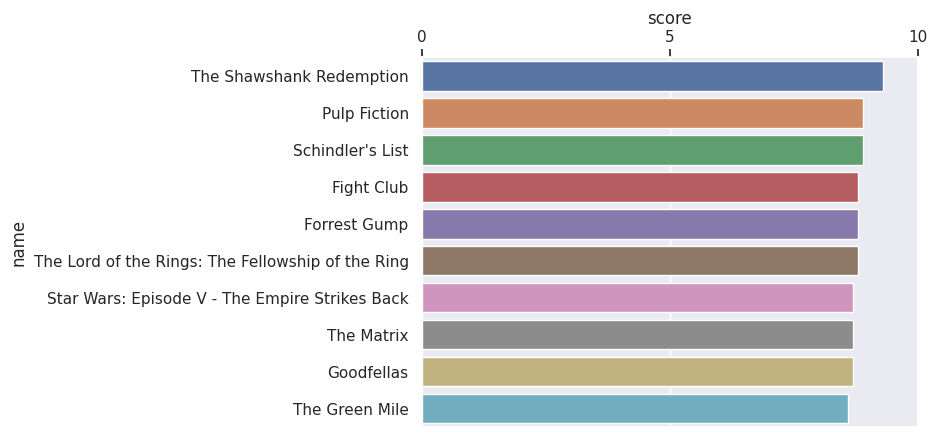

In [8]:
xticks = np.linspace(0, 10, num=3)
fig = sns.barplot(
    data=base_top_10,
    x='score',
    y='name'
)
fig.xaxis.set_ticks_position('top')
fig.xaxis.set_label_position('top')
plt.xticks(xticks);

 - ### Top 10 piores filmes (pontuação)


In [9]:
base_top_10 = agrupar_top_10(base=base, ord_decres=True, col = 'score')

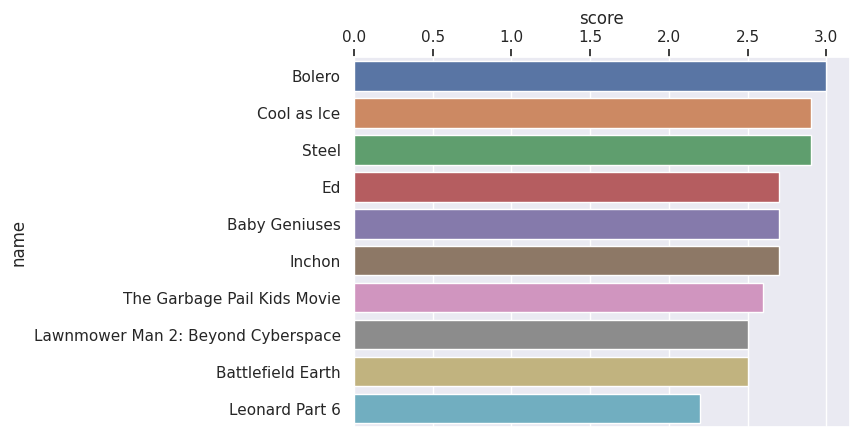

In [10]:
fig = sns.barplot(
    data=base_top_10,
    x='score',
    y='name'
)
fig.xaxis.set_ticks_position('top')
fig.xaxis.set_label_position('top')

 - ### Top 10 filmes mais votados (votos)

In [11]:
base_top_10 = agrupar_top_10(base=base, ord_decres=False, col='votes')

/tmp/ipykernel_5712/2598375566.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


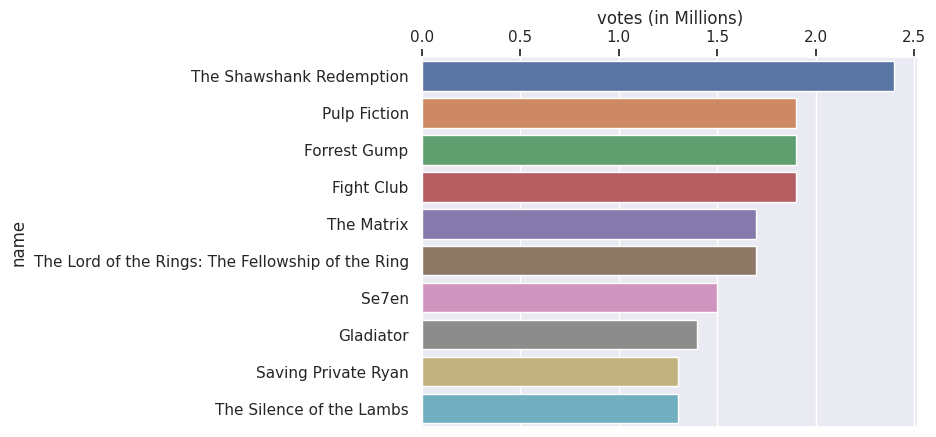

In [12]:
fig = sns.barplot(
    data=base_top_10,
    x='votes',
    y='name'
)
xlabels = ['{:,.1f}'.format(x) for x in fig.get_xticks() / 1000000]
fig.set_xticklabels(xlabels)
fig.set(xlabel='votes (in Millions)')
fig.xaxis.set_ticks_position('top')
fig.xaxis.set_label_position('top')

 - ### Top 10 filmes menos votados (votos)

In [13]:
base_top_10 = agrupar_top_10(base=base, ord_decres=True, col = 'votes')

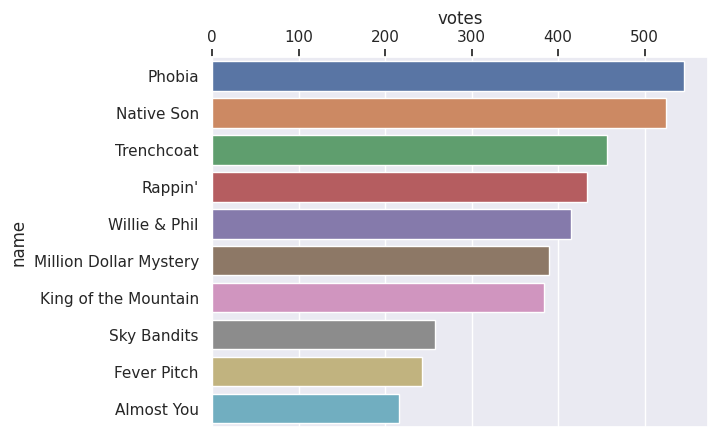

In [14]:
fig = sns.barplot(
    data=base_top_10,
    x='votes',
    y='name'
)
fig.xaxis.set_ticks_position('top')
fig.xaxis.set_label_position('top')

---

## Quais os maiores e piores filmes, em relação a custo e lucro bruto e líquido?

 - ### Top 10 filmes com maiores "budget"

In [15]:
base_top_10 = agrupar_top_10(base=base, ord_decres=False, col='budget')

/tmp/ipykernel_5712/2363724877.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


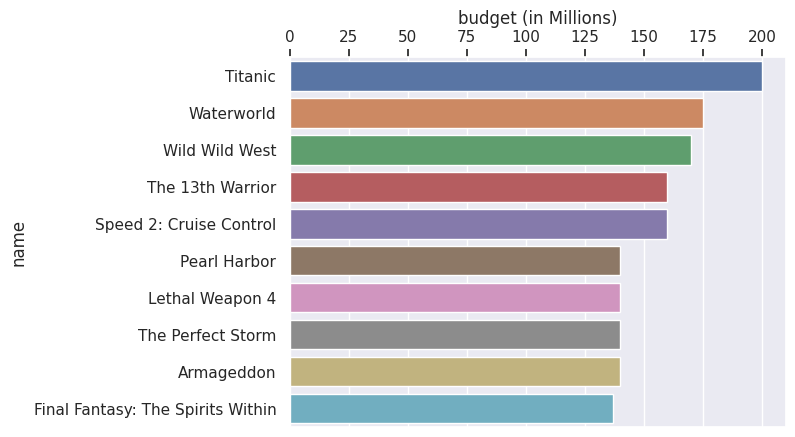

In [16]:
fig = sns.barplot(data=base_top_10, x='budget', y='name')
xlabels = ['{:,.0f}'.format(x) for x in fig.get_xticks() / 1000000]
fig.set_xticklabels(xlabels)
fig.set(xlabel='budget (in Millions)')
fig.xaxis.set_ticks_position('top')
fig.xaxis.set_label_position('top')

 - ### Top 10 filmes com menores "budget"

In [17]:
base_top_10 = agrupar_top_10(base=base, ord_decres=True, col='budget')

/tmp/ipykernel_5712/1413871374.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


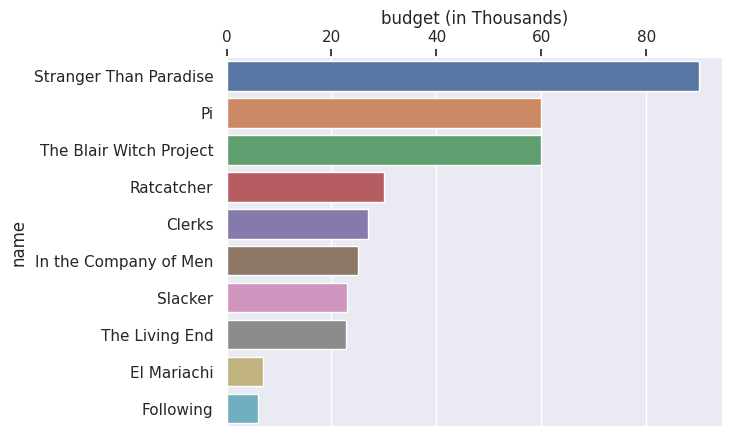

In [18]:
fig = sns.barplot(data=base_top_10, x='budget', y='name')
xlabels = ['{:,.0f}'.format(x) for x in fig.get_xticks() / 1000]
fig.set_xticklabels(xlabels)
fig.xaxis.set_ticks_position('top')
fig.xaxis.set_label_position('top')
fig.set(xlabel='budget (in Thousands)');

 - ### Melhores Filmes (gross - Lucro Bruto)

In [19]:
base_top_10 = agrupar_top_10(base=base, ord_decres=False, col='gross')

/tmp/ipykernel_5712/1822244030.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


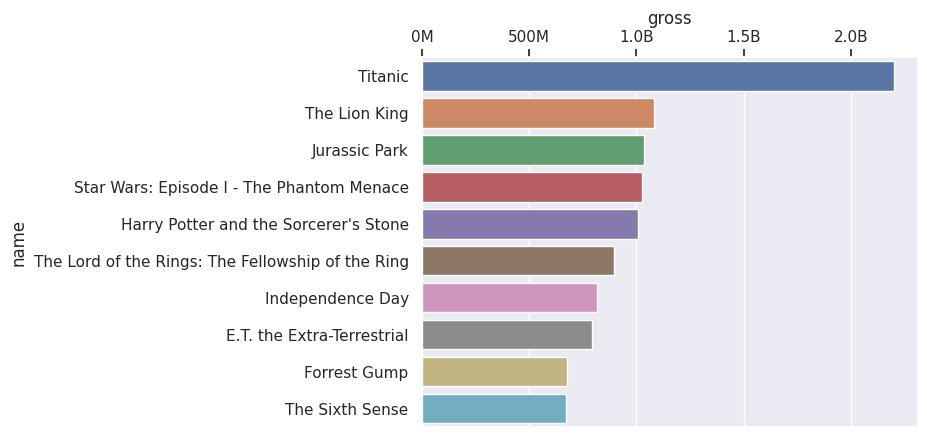

In [20]:
fig = sns.barplot(
    data=base_top_10, 
    x='gross', 
    y='name'
)
xlabels = ['{:,.0f}'.format(x) + 'M' if int(x) < 1000 else '{:,.1f}'.format(x / 1000) + 'B' for x in fig.get_xticks() / 1000000]
fig.set_xticklabels(xlabels)
fig.xaxis.set_ticks_position('top')
fig.xaxis.set_label_position('top')
fig.set(xlabel='gross');

 - ### Piores Filmes (gross - Lucro Bruto)

In [21]:
base_top_10 = agrupar_top_10(base=base, ord_decres=True, col='gross')

/tmp/ipykernel_5712/2666807355.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


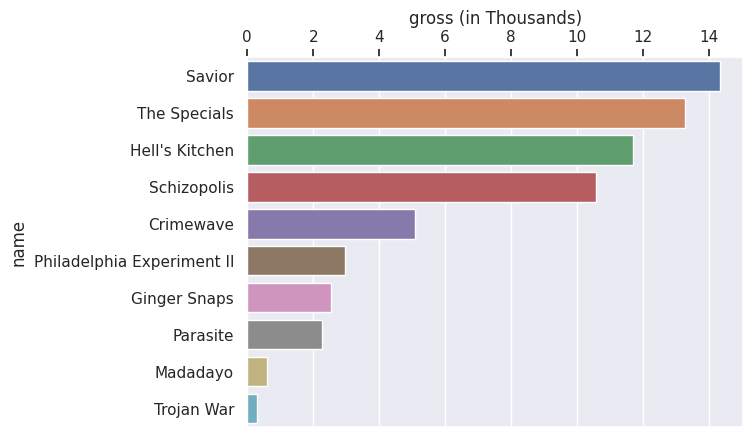

In [22]:
fig = sns.barplot(data=base_top_10, x='gross', y='name')
xlabels = ['{:,.0f}'.format(x) for x in fig.get_xticks() / 1000]
fig.set_xticklabels(xlabels)
fig.set(xlabel='gross (in Thousands)')
fig.xaxis.set_ticks_position('top')
fig.xaxis.set_label_position('top')

 - ### Melhores Filmes (liquid - Lucro Líquido)

In [23]:
base_top_10 = agrupar_top_10(base=base, ord_decres=False, col='liquid')

/tmp/ipykernel_5712/4056104993.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


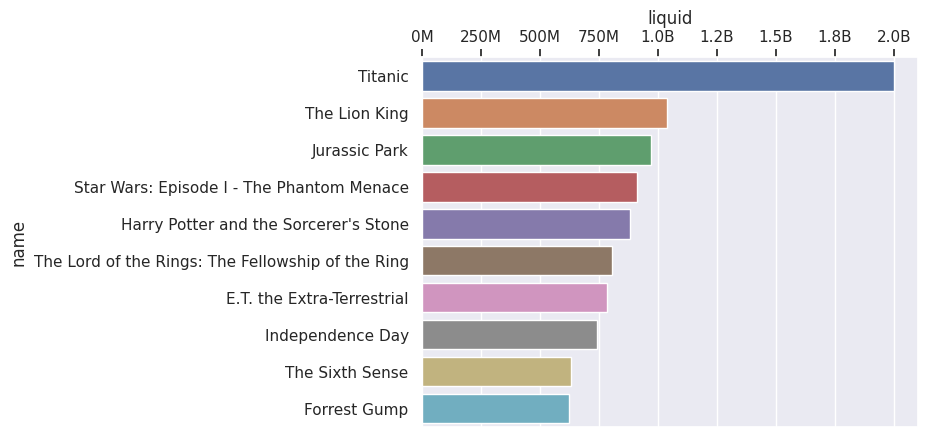

In [24]:
fig = sns.barplot(
    data=base_top_10,
    x='liquid', 
    y='name'
)
xlabels = ['{:,.0f}'.format(x) + 'M' if int(x) < 1000 else '{:,.1f}'.format(x / 1000) + 'B' for x in fig.get_xticks() / 1000000]
fig.set_xticklabels(xlabels)
fig.set(xlabel='liquid')
fig.xaxis.set_ticks_position('top')
fig.xaxis.set_label_position('top')

 - ### Piores Filmes (liquid - Lucro Líquido)

In [25]:
base_top_10 = agrupar_top_10(
    base=base,
    ord_decres=True,
    col='liquid'
)

/tmp/ipykernel_5712/3667509812.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(xlabels)


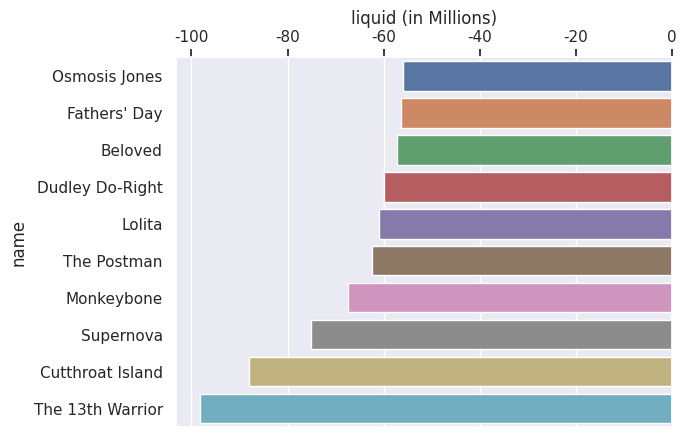

In [26]:
fig = sns.barplot(
    data=base_top_10,
    x='liquid', 
    y='name'
)
xlabels = ['{:,.0f}'.format(x) for x in fig.get_xticks() / 1000000]
fig.set_xticklabels(xlabels)
fig.xaxis.set_ticks_position('top')
fig.xaxis.set_label_position('top')
fig.set(xlabel='liquid (in Millions)');